In [1]:
import os
import numpy as np
import pandas as pd

import sklearn
from cuml.neighbors import KNeighborsRegressor

from utils import run_test, run_search_test, plot_search
from metrics import score_regression
from preprocess import get_dataset, preprocess_all, dataset_to_X_y


In [8]:
knn = KNeighborsRegressor()

scores = run_test(knn, seed=42, save_json=True, save_tex=False, df=True)

scores

,all_features,5_features,10_features,15_features,20_features
train_loss,0.600127,0.586645,0.588304,0.589612,0.586746
val_loss,0.489673,0.480900,0.493333,0.480626,0.478112


In [6]:
search_grid_scores = run_search_test(KNeighborsRegressor, "n_neighbors", np.arange(1, 31), seed=42, save_json=True, verbose=True)

search_grid_scores


{'1': {'all_features': {'train_loss': 1.0, 'val_loss': 0.44785027535940675},
  '5_features': {'train_loss': 0.992010699588504,
   'val_loss': 0.440568602247327},
  '10_features': {'train_loss': 0.9992957589350423,
   'val_loss': 0.4420011840388026},
  '15_features': {'train_loss': 1.0, 'val_loss': 0.43038676871879195},
  '20_features': {'train_loss': 1.0, 'val_loss': 0.44234254600166695}},
 '2': {'all_features': {'train_loss': 0.7437920963876048,
   'val_loss': 0.4753599206285464},
  '5_features': {'train_loss': 0.7289038877122309,
   'val_loss': 0.4591807105933918},
  '10_features': {'train_loss': 0.7304603371567909,
   'val_loss': 0.4644118871617088},
  '15_features': {'train_loss': 0.7364166781264663,
   'val_loss': 0.4582303503920166},
  '20_features': {'train_loss': 0.7344017004198994,
   'val_loss': 0.46363907742030624}},
 '3': {'all_features': {'train_loss': 0.6607959007943012,
   'val_loss': 0.4857940957764151},
  '5_features': {'train_loss': 0.6495316982203267,
   'val_loss': 

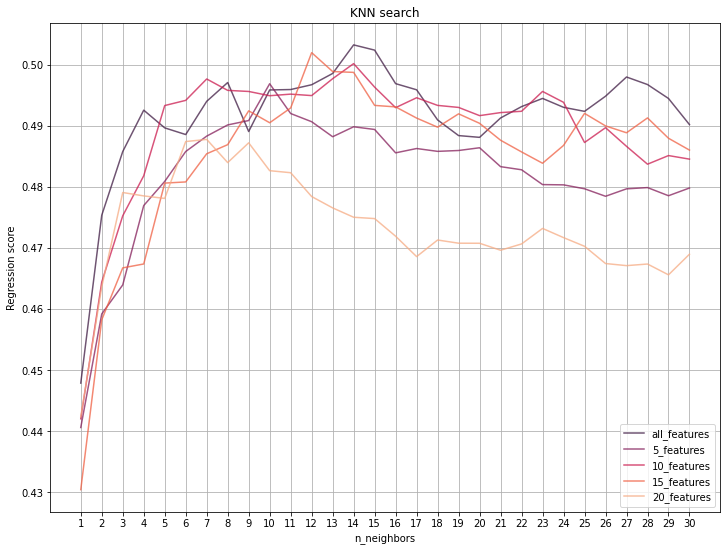

In [2]:
import json
from os.path import join
from utils import JSON_PATH

search_grid_scores = json.load(open(join(JSON_PATH, "KNeighborsRegressor_n_neighbors.json"), 'r'))

plot_search("KNN search", "n_neighbors", search_grid_scores, save_png=True, allinfos=False)


In [5]:
from sklearn.neighbors import KNeighborsRegressor
from collections import defaultdict
import numpy as np
from utils import get_best_score_from_run, run_search_test, jsonsave
from functools import partial
metrics = ["minkowski", "euclidean", "manhattan", "chebyshev"]

d = defaultdict(dict)
data = dict()
for metric in metrics:
    knn = partial(KNeighborsRegressor, metric=metric, n_jobs=-1)
    scores = run_search_test(knn, "n_neighbors", np.arange(1, 20), seed=42, save_json=False, verbose=True)
    data[metric] = scores
    d[metric] = get_best_score_from_run(scores)

jsonsave(d, "KNeighborsRegressor_best_grid_search_metric.json")
jsonsave(data, "KNeighborsRegressor_grid_search_metric.json")

d

In [9]:
knn = partial(KNeighborsRegressor, metric="minkowski",p=5,n_jobs=-1)
scores = run_search_test(knn, "n_neighbors", np.arange(1, 20), seed=42, save_json=False, verbose=True)
scores
jsonsave(scores, "prout.json")

KeyboardInterrupt: 

In [6]:
import json
from os.path import join
from utils import get_best_score_from_run_all_features, JSON_PATH, jsonsave

data = json.load(open(join(JSON_PATH, "KNeighborsRegressor_grid_search_metric.json"), 'r'))
d = dict()
for k, v in data.items():
    d[k] = get_best_score_from_run_all_features(v)

jsonsave(d, "KNeighborsRegressor_best_grid_search_all_metric.json")